In [ ]:
# !pip install --upgrade spacy

In [ ]:
import os
import pandas as pd
import re
import spacy
from spacy import logger
from spacy import displacy
from time import sleep
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Loading the dataset  :
with open("training.txt", "r") as train_file:
    training_data = train_file.read()

with open("test.txt", "r") as test_file:
    testing_data = test_file.read()




In [ ]:
# Training set :
ctr = 0
train = []
for line in training_data.split("\n\n"):
  train.append(line)

# Test Set:
ctr = 0
test = []
for line in testing_data.split("\n\n"):
  test.append(line)



In [ ]:
len(train)


501

In [ ]:
len(test)

501

In [ ]:
try:

  def article_extractor(text):
    article = re.findall(r'a\|(.*)\n' , text)
    return article[0]

  def title_extractor(text):
    title = re.findall(r't\|(.*)\n' , text)
    return title[0]

except Exception as e:
  pass


In [ ]:
train_article  = []
try:
  for x in train:
    train_article.append(title_extractor(x)+' '+article_extractor(x))

  for x in test:
    test_article.append(title_extractor(x)+' '+article_extractor(x))

except Exception as e:
  pass



In [ ]:
len(train_article)

500

In [ ]:
test_article  = []

try:
  for x in test:
    test_article.append(title_extractor(x)+' '+article_extractor(x))
except Exception as e:
  pass

In [ ]:
len(test_article)

500

In [ ]:
## Adding articles to the pandas data frame  :
train_df  = pd.DataFrame(train_article, columns=['article'])
test_df  = pd.DataFrame(test_article, columns=['article'])


train_df.head()

,article
0,Naloxone reverses the antihypertensive effect ...
1,Lidocaine-induced cardiac asystole. Intravenou...
2,Suxamethonium infusion rate and observed fasci...
3,"Galanthamine hydrobromide, a longer acting ant..."
4,Effects of uninephrectomy and high protein fee...


In [ ]:
test_df.head()

,article
0,Famotidine-associated delirium. A series of si...
1,Indomethacin induced hypotension in sodium and...
2,Late-onset scleroderma renal crisis induced by...
3,The risk and associated factors of methampheta...
4,Cerebellar sensory processing alterations impa...


In [ ]:
train_df['article'][0] # To Check the full article :

'Naloxone reverses the antihypertensive effect of clonidine. In unanesthetized, spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine, 5 to 20 micrograms/kg, was inhibited or reversed by nalozone, 0.2 to 2 mg/kg. The hypotensive effect of 100 mg/kg alpha-methyldopa was also partially reversed by naloxone. Naloxone alone did not affect either blood pressure or heart rate. In brain membranes from spontaneously hypertensive rats clonidine, 10(-8) to 10(-5) M, did not influence stereoselective binding of [3H]-naloxone (8 nM), and naloxone, 10(-8) to 10(-4) M, did not influence clonidine-suppressible binding of [3H]-dihydroergocryptine (1 nM). These findings indicate that in spontaneously hypertensive rats the effects of central alpha-adrenoceptor stimulation involve activation of opiate receptors. As naloxone and clonidine do not appear to interact with the same receptor site, the observed functional antagonism suggests the release 

In [ ]:
# To get the labels for the annotations :
try:
  def get_labels(text):
    l  = re.findall(r'\t(.*)' , text)
    l = [x.split('\t') for x in l]
    labels  = []
    for i in l:
      try:
        labels.append((int(i[0]) , int(i[1]) , i[3]))
      except Exception as e:
        pass
    return labels


  def get_labels_and_entity(text):
    l = re.findall(r'\t(.*)' , text)
    l = [x.split('\t') for x in l]
    labels  = []
    for i in l:
      try:
        labels.append((int(i[0]) , int(i[1]) , i[3], i[2]))
      except Exception as e:
        pass
    return labels
except Exception as e:
  pass


In [ ]:
train_labels  = [get_labels(x) for x in train]
test_labels = [get_labels(x) for x in test]

In [ ]:
len(train_labels)

501

In [ ]:
len(test_labels)

501

In [ ]:
min_length = min(len(test_df), len(test_labels), len(train_df), len(train_labels))

test_df = test_df.iloc[:min_length].copy()
train_df = train_df.iloc[:min_length].copy()

test_df['labels'] = test_labels[:min_length]
train_df['labels'] = train_labels[:min_length]

In [ ]:
test_df.head()

,article,labels
0,Famotidine-associated delirium. A series of si...,"[(0, 10, Chemical), (22, 30, Disease), (55, 65..."
1,Indomethacin induced hypotension in sodium and...,"[(0, 12, Chemical), (21, 32, Disease), (36, 42..."
2,Late-onset scleroderma renal crisis induced by...,"[(11, 35, Disease), (47, 57, Chemical), (62, 7..."
3,The risk and associated factors of methampheta...,"[(35, 50, Chemical), (51, 60, Disease), (64, 7..."
4,Cerebellar sensory processing alterations impa...,"[(78, 97, Disease), (110, 120, Disease), (192,..."


In [ ]:
# Preparing the data for custom NER

In [ ]:
training_data  = []
for i, j  in zip(train_article , train_labels):
  training_data.append((i , j))

In [ ]:
training_data[0]

('Naloxone reverses the antihypertensive effect of clonidine. In unanesthetized, spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine, 5 to 20 micrograms/kg, was inhibited or reversed by nalozone, 0.2 to 2 mg/kg. The hypotensive effect of 100 mg/kg alpha-methyldopa was also partially reversed by naloxone. Naloxone alone did not affect either blood pressure or heart rate. In brain membranes from spontaneously hypertensive rats clonidine, 10(-8) to 10(-5) M, did not influence stereoselective binding of [3H]-naloxone (8 nM), and naloxone, 10(-8) to 10(-4) M, did not influence clonidine-suppressible binding of [3H]-dihydroergocryptine (1 nM). These findings indicate that in spontaneously hypertensive rats the effects of central alpha-adrenoceptor stimulation involve activation of opiate receptors. As naloxone and clonidine do not appear to interact with the same receptor site, the observed functional antagonism suggests the release

In [ ]:
# The expected data for the doc bin by which we can convert the data in the binary format :

In [ ]:
# !pip install spacy[transformers]

In [ ]:
#!python -m spacy download en_core_web_trf

In [ ]:
import spacy
import spacy.training
from spacy.tokens import DocBin
# import spacy_transformers



In [ ]:
nlp = spacy.load("en_core_web_sm")  #en_core_web_trf #en_core_web_sm
db  = DocBin()


In [ ]:
for text, annotations in training_data:
  doc  = nlp(text)
  ents = []
  for start, end , label in annotations:
    span  = doc.char_span(start , end , label=label)
    if not span == None:
      ents.append(span)
  doc.ents  = ents
  db.add(doc)


# Saving the data to the dircecotry  :
db.to_disk('train.spacy')

In [ ]:
# Checking the efficiency of the model :
testing_data = []
for i,j in zip(test_article , test_labels):
  testing_data.append((i,j))

In [ ]:
db  = DocBin()
for text,annotations in testing_data:
  doc  = nlp(text)
  ents = []
  for start, end , label in annotations:
    span  = doc.char_span(start , end , label=label)
    if not span == None:
      ents.append(span)

db.to_disk('dev.spacy')


In [ ]:
# Train Model:


In [ ]:
!python -m spacy init fill-config --help

                                                                                                    
 Usage: python -m spacy init fill-config [OPTIONS] BASE_PATH [OUTPUT_FILE]                          
                                                                                                    
 Fill partial config file with default values. Will add all missing settings from the default       
 config and will create all objects, check the registered functions for their default values and    
 update the base config. This command can be used with a config generated via the training          
 quickstart widget: https://spacy.io/usage/training#quickstart                                      
 DOCS: https://spacy.io/api/cli#init-fill-config                                                    
                                                                                                    
╭─ Arguments ──────────────────────────────────────────────────────────────────────────────

In [ ]:
# !python -m spacy init config base_config.config --lang en --pipeline ner

!python -m spacy init config base_config.cfg --lang en --pipeline ner

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
base_config.cfg
You can now add your data and train your pipeline:
python -m spacy train base_config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
# !python -m spacy init fill-config 'base_config.config' 'config.config'

!python -m spacy init fill-config 'base_config.cfg' 'config.cfg'

⚠ Nothing to auto-fill: base config is already complete
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
# Model Training :

#python -m spacy train base_config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./dev.spacy



# !python -m spacy train config.config --output 'trained_output' --paths.train 'train.spacy'

model_save_path = f"{drive_path}/trained_ner_model"
!python -m spacy train config.cfg --output 'trained_output' --paths.train '/content/train.spacy' --paths.dev '/content/dev.spacy'


# !python -m spacy train config.cfg --output model_save_path --paths.train '/content/train.spacy' --paths.dev '/content/dev.spacy'


✔ Created output directory: model_save_path
ℹ Saving to output directory: model_save_path
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     63.90    0.00    0.00    0.00    0.00
  0     200       1189.64   6743.44    0.00    0.00    0.00    0.00
  0     400        226.71   3478.13    0.00    0.00    0.00    0.00
  1     600        203.42   2513.70    0.00    0.00    0.00    0.00
  1     800        215.85   1813.25    0.00    0.00    0.00    0.00
  2    1000        219.28   1913.97    0.00    0.00    0.00    0.00
  2    1200        211.33   1180.20    0.00    0.00    0.00    0.00
  2    1400        220.58   1249.61    0.00   

In [ ]:
# Model Testing :

unique_labels  = set()

for example in testing_data:
  entities  = example[1]
  for entity in entities:
    entity_label = entity[2]
    unique_labels.add(entity_label)
unique_labels_list = list(unique_labels)


colors  = {
    "Disease" : "#ff698f",
    "Chemical" : "#1472ff"
}

options  = {"ents" : ["Disease" , "Chemical"] , "colors" : colors}

print("Entities to be recognised in the medical text")
print(unique_labels_list)

Entities to be recognised in the medical text
['Disease', 'Chemical']


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('/content/trained_output/model-best')


In [ ]:
doc = nlp(testing_data[0][0])
spacy.displacy.render(doc ,style  = "ent" , jupyter = True  , options = options)

In [ ]:
# for i in range(10):
#   doc = nlp(testing_data[i][0])
#   spacy.displacy.render(doc ,style  = "ent" , jupyter = True  , options = options)

In [ ]:
# LEts check on the base model for the same text and see the difference :
nlp_2 = spacy.load("en_core_web_sm")

In [ ]:
doc  = nlp(testing_data[0][0])
spacy.displacy.render(doc ,style  = "ent" , jupyter = True  , options = options)

In [ ]:
!pip install scikit-learn seaborn


In [ ]:
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
nlp = spacy.load("/content/trained_output/model-best")

In [ ]:
testing_data[0][0]

'Famotidine-associated delirium. A series of six cases. Famotidine is a histamine H2-receptor antagonist used in inpatient settings for prevention of stress ulcers and is showing increasing popularity because of its low cost. Although all of the currently available H2-receptor antagonists have shown the propensity to cause delirium, only two previously reported cases have been associated with famotidine. The authors report on six cases of famotidine-associated delirium in hospitalized patients who cleared completely upon removal of famotidine. The pharmacokinetics of famotidine are reviewed, with no change in its metabolism in the elderly population seen. The implications of using famotidine in elderly persons are discussed.'

In [ ]:
len(testing_data)

500

In [ ]:
true_labels = []
pred_labels = []
all_labels = ['Disease', 'Chemical']

In [ ]:
for i in range(len(testing_data)):
  doc = nlp(testing_data[i][0])
  true_ents = {testing_data[i][0][ent.start_char:ent.end_char]: ent.label_ for ent in doc.ents}
  true_labels.extend(true_ents.values())

  pred_ents = {ent.text: ent.label_ for ent in doc.ents}
  pred_labels.extend(pred_ents.values())

cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)


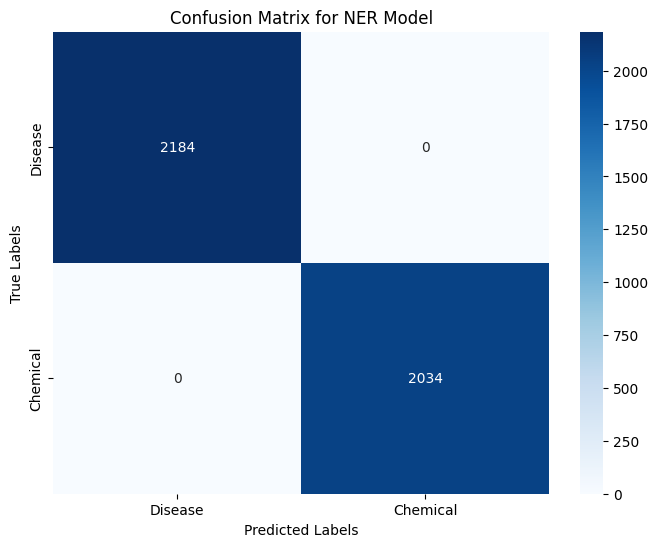

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for NER Model")
plt.show()

In [ ]:
print(classification_report(true_labels, pred_labels, target_names=all_labels))

              precision    recall  f1-score   support

     Disease       1.00      1.00      1.00      2034
    Chemical       1.00      1.00      1.00      2184

    accuracy                           1.00      4218
   macro avg       1.00      1.00      1.00      4218
weighted avg       1.00      1.00      1.00      4218



In [ ]:
## Testing the dataset in the real world example : for confirmation :

import spacy
model_path =   '/content/trained_output/model-best'
check_model  = spacy.load(model_path)

sample_text = input("Enter Medical Based Text  :")

doc = check_model(sample_text)
spacy.displacy.render(doc ,style  = "ent" , jupyter = True  , options = options)

Enter Medical Based Text  :I am having headache and i will have crocin today
